# Medical Insurance Cost Prediction — Data Preprocessing (Tutorial 2)
 This notebook applies all data preprocessing techniques discussed in **Tutorial 2**
 to the Medical Insurance Cost Prediction dataset from Kaggle.

 **Steps Covered:**
 1. Data Loading & Exploration
 2. Handling Missing Values
 3. Outlier Detection (Z-Score)
 4. Encoding Categorical Variables
 5. Feature Scaling (Normalization & Standardization)
 6. Data Splitting (Hold-out & K-Fold)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
import warnings
warnings.filterwarnings('ignore')


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


print("="*60)
print("MEDICAL INSURANCE COST PREDICTION — DATA PREPROCESSING")
print("="*60)

MEDICAL INSURANCE COST PREDICTION — DATA PREPROCESSING


1. Data Loading and Initial Exploration

In [4]:
df = pd.read_csv('medical_insurance.csv')
print("Data Loaded Successfully!\n")
print(f"Shape: {df.shape}")
print("\nFirst 5 Rows:")
display(df.head())


print("\nData Types Info:")
print(df.info())

Data Loaded Successfully!

Shape: (100000, 54)

First 5 Rows:


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0



Data Types Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-n

2. Handling Missing Values


Missing Values Summary:


,Missing Count,Percentage
alcohol_freq,30083,30.083


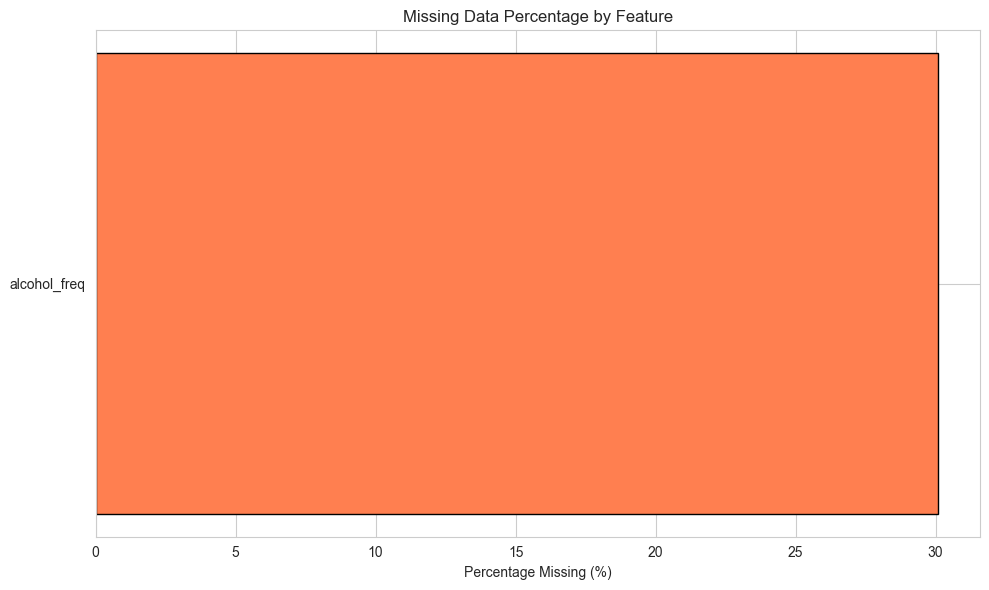

Missing values handled: 'alcohol_freq' filled with 'Unknown'


In [6]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Percentage', ascending=False)


print("\nMissing Values Summary:")
display(missing_df)


plt.figure(figsize=(10, 6))
plt.barh(missing_df.index, missing_df['Percentage'], color='coral', edgecolor='black')
plt.xlabel('Percentage Missing (%)')
plt.title('Missing Data Percentage by Feature')
plt.tight_layout()
plt.show()

df['alcohol_freq'].fillna('Unknown', inplace=True)
print("Missing values handled: 'alcohol_freq' filled with 'Unknown'")

3. Outlier Detection 

In [ ]:
# Detect Outliers using Z-score
nnumeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(stats.zscore(df[nnumeric_cols]))
outlier_mask = (z_scores > 3)   
print(f"Outliers detected: {np.sum(outlier_mask)} data points exceed |Z| > 3.")

Outliers detected: person_id                         0
age                             131
income                         1863
household_size                  853
dependents                     1371
bmi                             295
visits_last_year               1103
hospitalizations_last_3yrs      387
days_hospitalized_last_3yrs    3915
medication_count               1591
systolic_bp                     259
diastolic_bp                    244
ldl                             138
hba1c                          3258
deductible                     5013
copay                             0
policy_term_years                 0
policy_changes_last_2yrs       4953
provider_quality                152
risk_score                        0
annual_medical_cost            1876
annual_premium                 1861
monthly_premium                1861
claims_count                   2116
avg_claim_amount               1860
total_claims_paid              1869
chronic_count                   326
hypertens

4.  Label Encoding Categorical Variables

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {len(cat_cols)} found\n{list(cat_cols)}")

# Apply Label Encoding to all categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("All categorical variables encoded using Label Encoding")
display(df.head())

Categorical Columns: 0 found
[]
All categorical variables encoded using Label Encoding


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,0,2,1,22700.0,1,1,1,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,0,2,2,12800.0,4,1,0,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,1,2,0,40700.0,2,1,1,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,1,2,1,15600.0,5,1,2,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,1,0,1,89600.0,1,1,2,2,...,0,1,0,2,0,1,1,0,1,0


5. Feature Scaling

Applied Min-Max Normalization and Z-Score Standardization


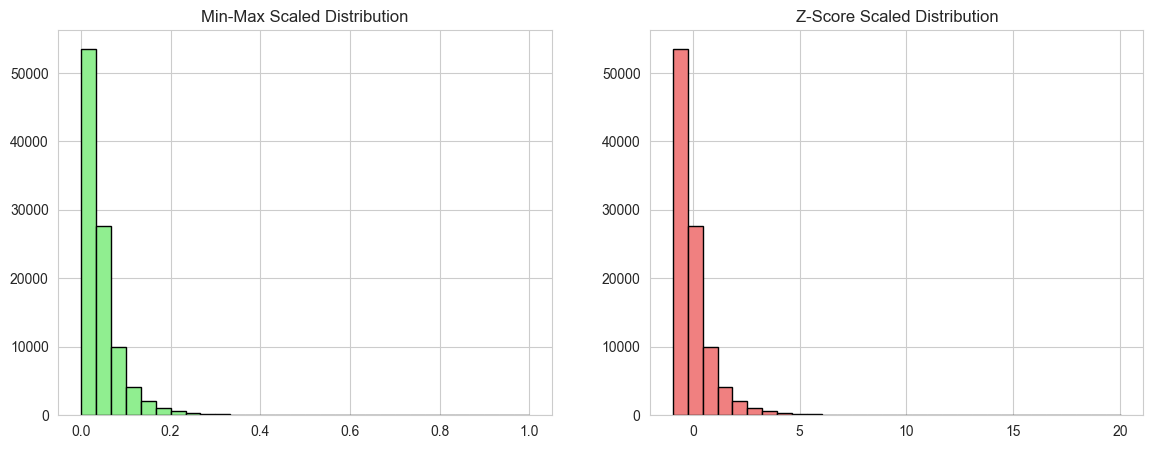

In [9]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns


# Min-Max Normalization
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])


# Z-Score Standardization
std_scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[num_cols] = std_scaler.fit_transform(df_zscore[num_cols])


print("Applied Min-Max Normalization and Z-Score Standardization")


# Visualize scaling effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df_minmax['annual_medical_cost'], bins=30, color='lightgreen', edgecolor='black')
axes[0].set_title('Min-Max Scaled Distribution')
axes[1].hist(df_zscore['annual_medical_cost'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title('Z-Score Scaled Distribution')
plt.show()

6. Data Splitting

In [10]:
X = df.drop('annual_medical_cost', axis=1)
y = df['annual_medical_cost']
# Hold-out Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Hold-out Split → Train: {X_train.shape}, Test: {X_test.shape}")


# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print("\nK-Fold Cross Validation (k=5):")
for fold, (train_idx, val_idx) in enumerate(kfold.split(X), 1):
    print(f"Fold {fold}: Train={len(train_idx)}, Validation={len(val_idx)}")

Hold-out Split → Train: (70000, 53), Test: (30000, 53)

K-Fold Cross Validation (k=5):
Fold 1: Train=80000, Validation=20000
Fold 2: Train=80000, Validation=20000
Fold 3: Train=80000, Validation=20000
Fold 4: Train=80000, Validation=20000
Fold 5: Train=80000, Validation=20000
